## Capstone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lectura de datos

In [2]:
ventas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='VENTAS')
proyeccion_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='PROY 10 AÑOS')
bodegas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='BODEGAS')
comunas_df = pd.read_excel('Base de Datos Bodega.xlsx', sheet_name='COMUNAS')

### Limpieza y Preprocesamiento

In [3]:
## Limpieza
# Eliminar filas con valores faltantes
ventas_df.dropna(inplace=True)
ventas_df = ventas_df.drop_duplicates()

# Limpieza y preprocesamiento de la hoja 'PROY 10 AÑOS'
# Eliminar filas con valores faltantes
proyeccion_df.dropna(inplace=True)
proyeccion_df = proyeccion_df.drop_duplicates()

### Análisis de Ventas y Proyecciones a 10 años por Bodega (Cantidades vendidas por Bodega)

In [4]:
ventas_agrupadas = ventas_df.groupby('ID Bodega Despacho')['Cantidad'].sum()
proy_10_anos_agrupadas = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()

print('-'*100)
print(f'Cantidades vendidas por bodega HOY')
print(ventas_agrupadas)

print('-'*100)
print(f'Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:')
print(proy_10_anos_agrupadas)

----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodega HOY
ID Bodega Despacho
1     1.172112e+06
2     4.897608e+05
3     3.099986e+05
4     4.896189e+05
5     5.609508e+05
6     7.424203e+05
7     5.790037e+05
8     1.069308e+06
9     2.047032e+05
10    5.710755e+05
Name: Cantidad, dtype: float64
----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:
ID Bodega Despacho
1     715591.018768
2     309332.306336
3     172644.156722
4     485242.258465
5     628082.243891
6     677239.364730
7     456102.734142
8     880368.695705
9     126379.967005
10    324772.019255
Name: Proyeccion 10 años, dtype: float64


### Calcular el total de demanda por comuna 

In [5]:
ventas_comuna = ventas_df.groupby('Comuna Despacho')['Cantidad'].sum()
print('-'*100)
print(f'Total de demanda por comuna:')
print(ventas_comuna)

----------------------------------------------------------------------------------------------------
Total de demanda por comuna:
Comuna Despacho
ALHUE              693.600000
ANDACOLLO         4063.566048
ANGOL            13992.261040
ANTOFAGASTA         59.895304
ANTUCO            1248.000000
                     ...     
VITACURA         75570.837024
YERBAS BUENAS    42419.918048
YUMBEL            2351.200000
YUNGAY           25212.819880
ZAPALLAR             3.200000
Name: Cantidad, Length: 228, dtype: float64


### Calcular el total de clientes asignados por bodega (Cantidades clientes por Bodega)

In [6]:
clientes_por_bodega = ventas_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega:')
print(clientes_por_bodega)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega:
ID Bodega Despacho
1     276
2     239
3     161
4     273
5     356
6     405
7     331
8     271
9     161
10    404
Name: ID Cliente, dtype: int64


### Clientes por bodega Proximos 10 años

In [7]:
clientes_por_bodega_proyeccion= proyeccion_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega PROXIMOS 10 años:')
print(clientes_por_bodega_proyeccion)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega PROXIMOS 10 años:
ID Bodega Despacho
1     223
2     191
3     125
4     216
5     283
6     309
7     262
8     220
9     125
10    317
Name: ID Cliente, dtype: int64


Comparación de Bodegas hoy y 10 años

<Figure size 1000x600 with 0 Axes>

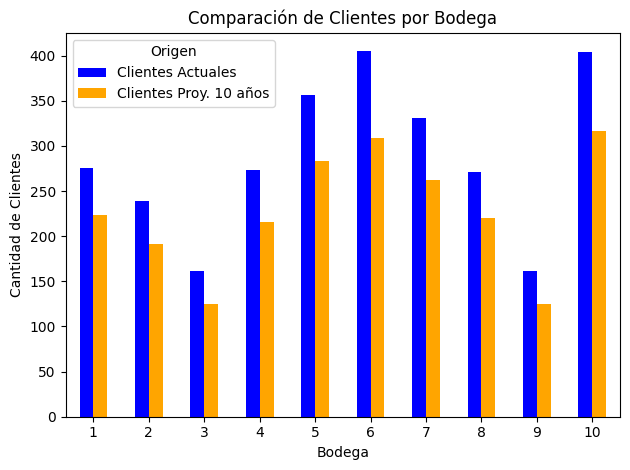

In [8]:
# Crear un DataFrame combinado
comparacion_df = pd.DataFrame({'Clientes Actuales': clientes_por_bodega, 'Clientes Proy. 10 años': clientes_por_bodega_proyeccion})

# Crear el histograma
plt.figure(figsize=(10, 6))
comparacion_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparación de Clientes por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Origen', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Cantidad total por cliente

In [9]:
cantidad_total_por_cliente = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
print(cantidad_total_por_cliente)

ID Cliente
1        1728.164816
2         878.660744
3       12311.242240
4       70756.899376
5         418.653512
            ...     
3123       93.600000
3124        4.000000
3125       16.000000
3126       64.000000
3127      112.800000
Name: Cantidad, Length: 2877, dtype: float64


Visualización de Boxplot de demandas históricas por cliente 

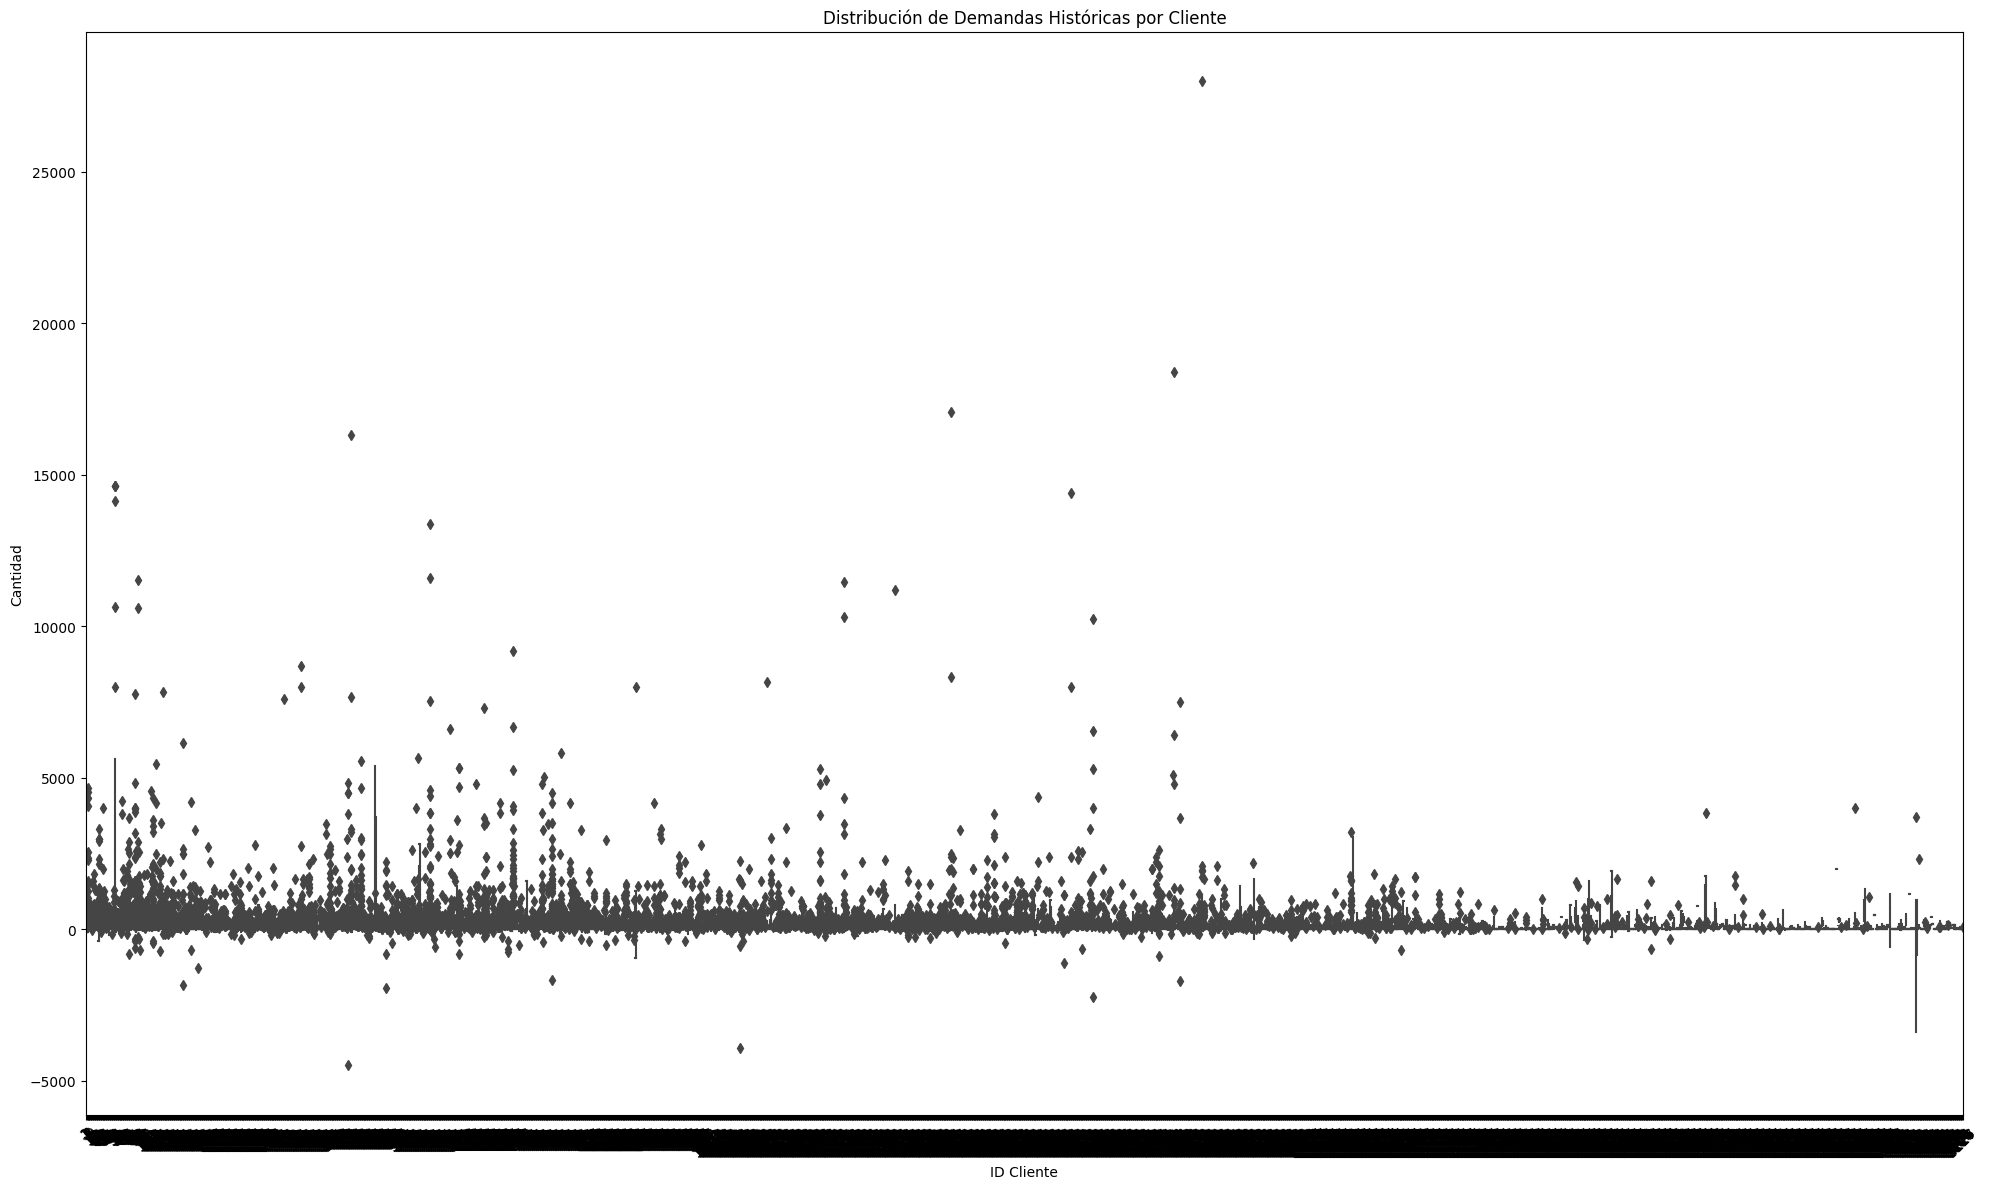

In [10]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='ID Cliente', y='Cantidad', data=ventas_df)
plt.title('Distribución de Demandas Históricas por Cliente')
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

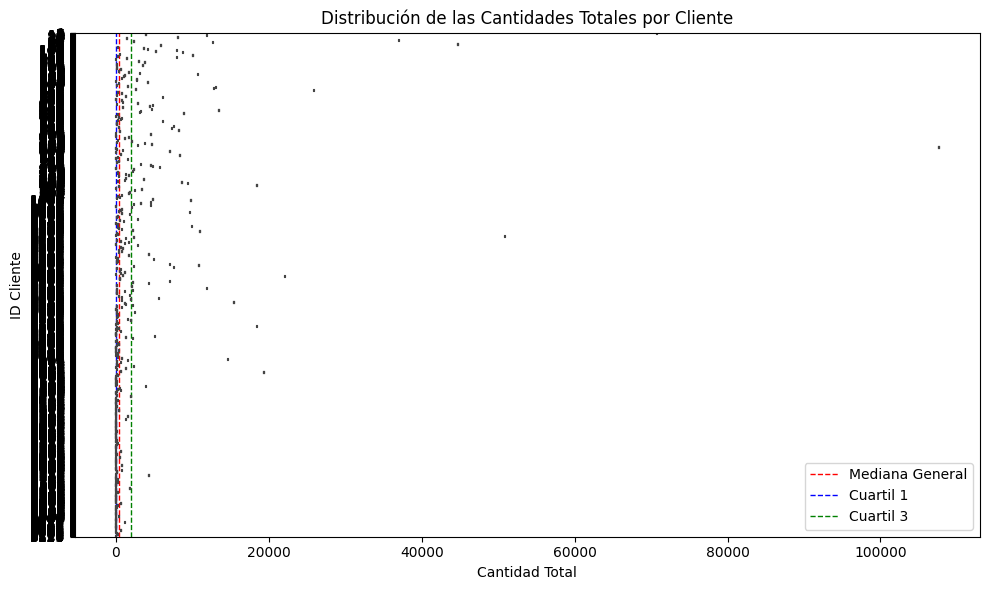

Mediana General de las Cantidades Totales: 393.509856
Cuartil 1 de las Cantidades Totales: 62.90576
Cuartil 3 de las Cantidades Totales: 1937.822856


In [11]:
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()

# Calcular la mediana general de todas las cantidades totales
mediana_general = cantidades_totales.median()

# Calcular los cuartiles 1 y 3
cuartil_1 = cantidades_totales.quantile(0.25)
cuartil_3 = cantidades_totales.quantile(0.75)

# Crear el diagrama de cajas y bigotes horizontal para las cantidades totales por cliente
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=cantidades_totales.values, y=cantidades_totales.index, orient='h')
plt.axvline(mediana_general, color='r', linestyle='dashed', linewidth=1, label='Mediana General')
plt.axvline(cuartil_1, color='b', linestyle='dashed', linewidth=1, label='Cuartil 1')
plt.axvline(cuartil_3, color='g', linestyle='dashed', linewidth=1, label='Cuartil 3')
plt.title('Distribución de las Cantidades Totales por Cliente')
plt.xlabel('Cantidad Total')
plt.ylabel('ID Cliente')
plt.legend()
plt.tight_layout()

plt.show()

print("Mediana General de las Cantidades Totales:", mediana_general)
print("Cuartil 1 de las Cantidades Totales:", cuartil_1)
print("Cuartil 3 de las Cantidades Totales:", cuartil_3)

Visualizar puntos de bodegas y comunas

In [12]:
# import folium
# from folium.plugins import MarkerCluster

# # Cargar coordenadas de comunas desde el DataFrame 'COMUNAS'
# coordenadas_comunas = comunas_df.set_index('Comuna')[['LAT', 'LON']].to_dict(orient='index')

# # Crear un mapa centrado en una ubicación
# m = folium.Map(location=[-33.45, -70.65], zoom_start=10)  # Coordenadas correspondientes a Santiago, Chile

# # Agregar marcadores para las bodegas
# for index, row in bodegas_df.iterrows():
#     folium.Marker([row['LAT'], row['LONG']], popup=f'Bodega {row["ID Bodega"]}').add_to(m)

# # Crear un grupo de marcadores para la demanda de los clientes
# demand_cluster = MarkerCluster().add_to(m)

# # Agregar marcadores para la demanda de los clientes y sus coordenadas de la hoja COMUNAS
# for index, row in ventas_df.iterrows():
#     comuna = row['Comuna Despacho']
#     coordenadas = coordenadas_comunas.get(comuna)
#     if coordenadas:
#         folium.CircleMarker([coordenadas['LAT'], coordenadas['LON']],
#                             radius=row['Cantidad'] * 0.1,  # Ajusta el radio según la demanda
#                             color='blue',
#                             fill=True,
#                             fill_color='blue',
#                             fill_opacity=0.6,
#                             popup=f'Demanda: {row["Cantidad"]}').add_to(demand_cluster)

# # Guardar el mapa en un archivo HTML
# m.save('mapa_demandas.html')

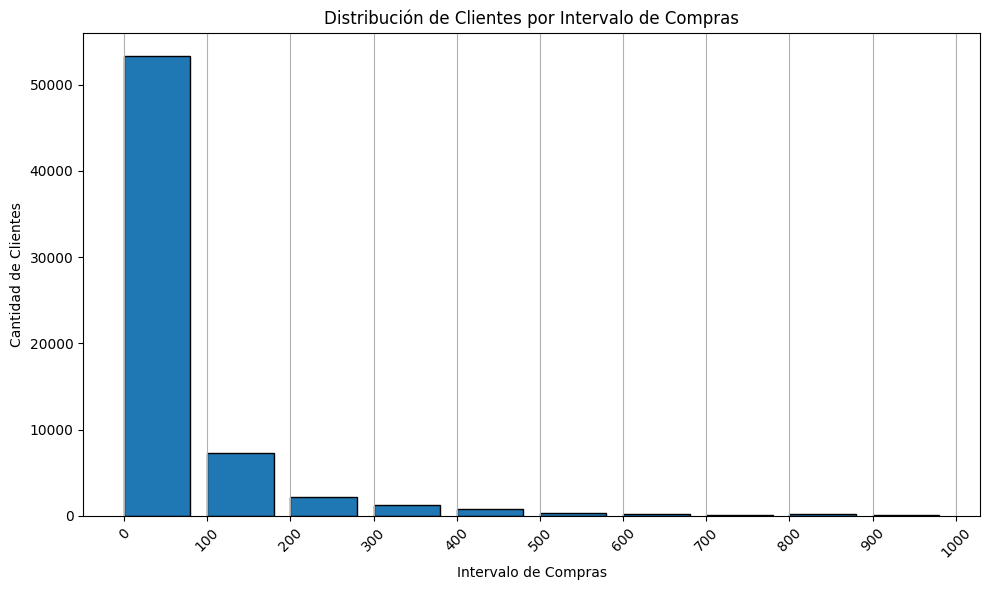

107632.720832
2151.1824224298744
393.509856


In [13]:
# Definir los límites de los intervalos
intervals = [i * 100 for i in range(int(cantidad_total_por_cliente.max() / 10000) + 1)]

# Calcular la cantidad de clientes en cada intervalo
clientes_por_intervalo = [((ventas_df['Cantidad'] >= intervals[i]) &
                           (ventas_df['Cantidad'] < intervals[i + 1])).sum()
                          for i in range(len(intervals) - 1)]

# # Crear el histograma
# plt.figure(figsize=(10, 6))
# plt.bar(intervals[:-1], clientes_por_intervalo, width=100)
# plt.title('Distribución de Clientes por Intervalo de Compras')
# plt.xlabel('Intervalo de Compras')
# plt.ylabel('Cantidad de Clientes')
# plt.tight_layout()

# plt.show()
# Crear el histograma con barras más delgadas
plt.figure(figsize=(10, 6))
plt.bar(intervals[:-1], clientes_por_intervalo, width=80, align='edge', edgecolor='black')
plt.title('Distribución de Clientes por Intervalo de Compras')
plt.xlabel('Intervalo de Compras')
plt.ylabel('Cantidad de Clientes')

# Configurar ticks en el eje x
plt.xticks(intervals, rotation=45)
plt.gca().xaxis.grid(True)

plt.tight_layout()
plt.show()
print(cantidad_total_por_cliente.max())
print(cantidad_total_por_cliente.mean())
print(cantidad_total_por_cliente.median())

## REVISAR CATEGORIZACION 


## Categorización

### Categorización 1

In [63]:
### Por cuartiles
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
cantidades_totales = cantidades_totales.sort_values()

# Calcular los cuartiles
cuartil_1 = cantidades_totales.quantile(0.25)
cuartil_3 = cantidades_totales.quantile(0.75)

clientes_con_menos_del_25_percent = cantidades_totales[cantidades_totales <= cuartil_1]
clientes_con_entre_25y75_percent = cantidades_totales[(cantidades_totales > cuartil_1) & (cantidades_totales <= cuartil_3)]
clientes_con_sobre_75_percent = cantidades_totales[cuartil_3 < cantidades_totales]

##### REVISAR DIFERENCIA ENTRE NUNIQUE Y COUNT EN 
# print("Cantidad de clientes con compras hasta el 25%:", clientes_con_menos_del_25_percent.count())
# print("Cantidad de clientes con compras entre el 25% y 75%:", clientes_con_entre_25y75_percent)
# print("Cantidad de clientes con compras sobre el 75%:", clientes_con_sobre_75_percent)
cantidad_total_clientes = ventas_df['ID Cliente'].nunique()

print("Cantidad total de clientes distintos:", cantidad_total_clientes)
print("cuartil_1", cuartil_1)
print("cuartil_3", cuartil_3)
# print("Suma de la separacion:", clientes_con_menos_del_25_percent + clientes_con_entre_25y75_percent + clientes_con_sobre_75_percent)
# print(clientes_con_sobre_75_percent)

Cantidad total de clientes distintos: 2877
cuartil_1 62.90576
cuartil_3 1937.822856


### Categorización 2

In [16]:
## Hacemos una copia por precaucion
ventas_aux = ventas_df.copy()

In [58]:

# # Crear una nueva columna 'Categoria' basada en las condiciones
ventas_aux['Categoria'] = 'Silver'  # Inicialmente, establecer a 'Silver' para todos
clientes_con_menos_del_25_percent = cantidades_totales[cantidades_totales <= cantidades_totales.max()*0.25]
clientes_con_entre_25y75_percent = cantidades_totales[(cantidades_totales > cantidades_totales.max()*0.25 ) & (cantidades_totales <= cantidades_totales.max()*0.75)]
clientes_con_sobre_75_percent = cantidades_totales[cantidades_totales.max()*0.75 < cantidades_totales]
# # Actualizar la columna 'Categoria' según las condiciones
ventas_aux.loc[ventas_aux['ID Cliente'].isin(clientes_con_entre_25y75_percent.index), 'Categoria'] = 'Gold'
ventas_aux.loc[ventas_aux['ID Cliente'].isin(clientes_con_sobre_75_percent.index), 'Categoria'] = 'Premium'

# print(ventas_aux)
# print('-'*100)
# # Contar la cantidad de cada categoría en la columna 'Categoria'
cantidad_por_categoria = ventas_aux['Categoria'].value_counts()

print(cantidad_por_categoria)
# cantidad_total_compras = ventas_aux.loc[ventas_aux['ID Cliente'] == 105, 'Cantidad'].sum()
# print(cantidad_total_compras)
print("-"*100)
print("Clientes bajo el 25%: ",clientes_con_menos_del_25_percent.count())
print("Clientes entre medio: ",clientes_con_entre_25y75_percent.count())
print("Clientes sobre el 75%: ",clientes_con_sobre_75_percent.count())
print("Suma de clientes: ",clientes_con_menos_del_25_percent.count()+clientes_con_entre_25y75_percent.count()+
      clientes_con_sobre_75_percent.count())
print('-'*100)
print("Clientes sgn df: ", ventas_aux['ID Cliente'].nunique())

Silver     61586
Gold        5083
Premium      476
Name: Categoria, dtype: int64
----------------------------------------------------------------------------------------------------
Clientes bajo el 25%:  2850
Clientes entre medio:  24
Clientes sobre el 75%:  3
Suma de clientes:  2877
----------------------------------------------------------------------------------------------------
Clientes sgn df:  2877


### Categorización 3

In [59]:
## Hacemos una copia por precaucion
ventas_aux_2 = ventas_df.copy()

In [54]:
# cantidades_totales.tail(100)
print(clientes_ultimos_100)

ID Cliente
312      11033.178896
45       11106.738680
161      11318.142728
1473     11471.472992
17       11869.795664
            ...      
4        70756.899376
440      70962.487528
547      89978.072968
48       97043.421360
684     107632.720832
Name: Cantidad, Length: 100, dtype: float64


In [56]:
# cantidades_totales.tail(1100)
clientes_entre_medio

ID Cliente
1906      909.603512
807       910.938352
38        910.991272
2099      914.962064
2633      916.000000
            ...     
1416    10911.326480
539     10942.162640
1202    10989.668144
528     11005.197528
1104    11016.736976
Name: Cantidad, Length: 1000, dtype: float64

In [60]:
# # Crear una nueva columna 'Categoria' basada en las condiciones
ventas_aux_2['Categoria'] = 'Silver'  # Inicialmente, establecer a 'Silver' para todos
clientes_con_menos_del_25_percent = cantidades_totales[cantidades_totales <= 909]
clientes_con_entre_25y75_percent = cantidades_totales[(cantidades_totales > 909 ) & (cantidades_totales <= 11033)]
clientes_con_sobre_75_percent = cantidades_totales[11033 < cantidades_totales]
# # Actualizar la columna 'Categoria' según las condiciones
ventas_aux_2.loc[ventas_aux['ID Cliente'].isin(clientes_con_entre_25y75_percent.index), 'Categoria'] = 'Gold'
ventas_aux_2.loc[ventas_aux['ID Cliente'].isin(clientes_con_sobre_75_percent.index), 'Categoria'] = 'Premium'

# print(ventas_aux)
# print('-'*100)
# # Contar la cantidad de cada categoría en la columna 'Categoria'
cantidad_por_categoria = ventas_aux_2['Categoria'].value_counts()

print(cantidad_por_categoria)
# cantidad_total_compras = ventas_aux.loc[ventas_aux['ID Cliente'] == 105, 'Cantidad'].sum()
# print(cantidad_total_compras)
print("-"*100)
print("Clientes bajo el 25%: ",clientes_con_menos_del_25_percent.count())
print("Clientes entre medio: ",clientes_con_entre_25y75_percent.count())
print("Clientes sobre el 75%: ",clientes_con_sobre_75_percent.count())
print("Suma de clientes: ",clientes_con_menos_del_25_percent.count()+clientes_con_entre_25y75_percent.count()+
      clientes_con_sobre_75_percent.count())
print('-'*100)
print("Clientes sgn df: ", ventas_aux_2['ID Cliente'].nunique())

Gold       42782
Premium    14218
Silver     10145
Name: Categoria, dtype: int64
----------------------------------------------------------------------------------------------------
Clientes bajo el 25%:  1777
Clientes entre medio:  1000
Clientes sobre el 75%:  100
Suma de clientes:  2877
----------------------------------------------------------------------------------------------------
Clientes sgn df:  2877


### Histograma que indica la cantidad de clientes Silver, Gold y Premium hay POR BODEGA

<Figure size 1000x600 with 0 Axes>

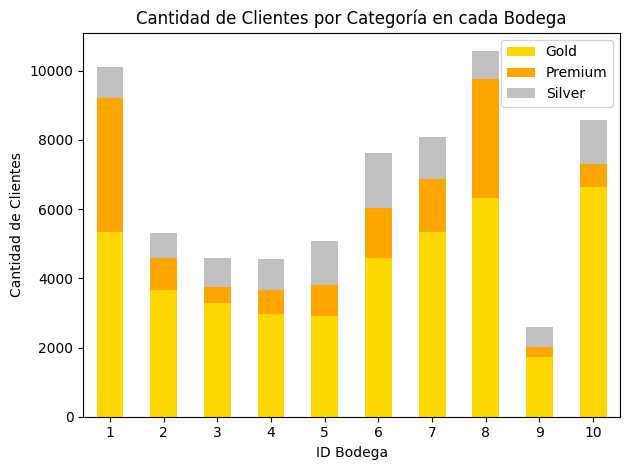

In [62]:

# Crear un DataFrame que tenga las categorías como columnas y bodegas como índice
clientes_por_bodega_categoria = ventas_aux_2.groupby(['ID Bodega Despacho', 'Categoria'])['ID Cliente'].count().unstack()

# Rellenar con ceros los valores NaN
clientes_por_bodega_categoria = clientes_por_bodega_categoria.fillna(0).astype(int)

# Crear el histograma
plt.figure(figsize=(10, 6))
clientes_por_bodega_categoria.plot(kind='bar', stacked=True, color=['gold', 'orange', 'silver'])
plt.title('Cantidad de Clientes por Categoría en cada Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Movimiento de Bodega durante los años 2017 - 2022

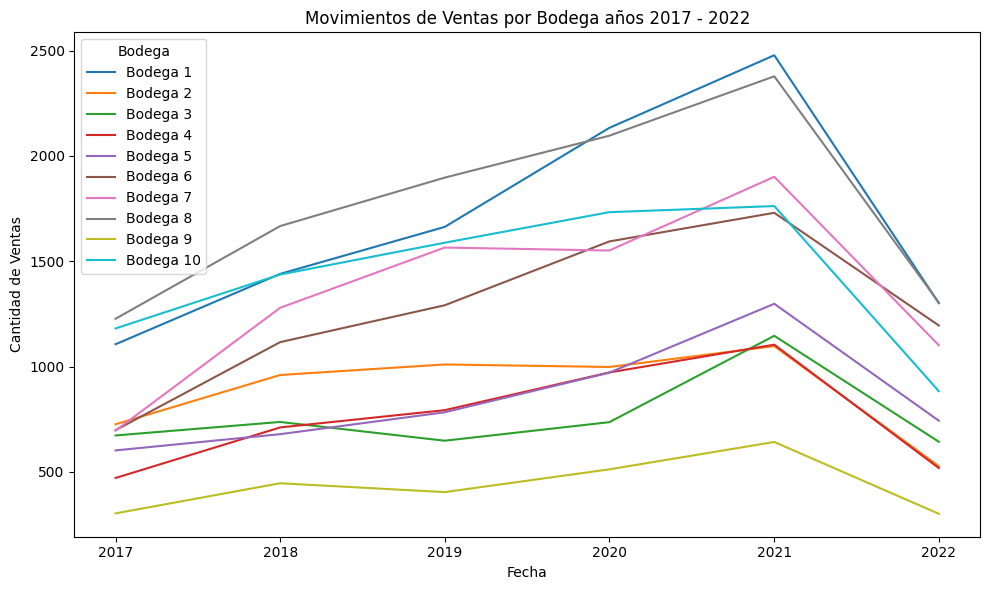

In [19]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])
# Crear un DataFrame que contenga las fechas, bodegas y cantidades por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.to_period('Y'), 'ID Bodega Despacho'])['ID Cliente'].count().unstack()

# Crear el gráfico de línea para cada bodega
plt.figure(figsize=(10, 6))
for bodega in movimientos_bodegas.columns:
    plt.plot(movimientos_bodegas.index.to_timestamp(), movimientos_bodegas[bodega], label=f'Bodega {bodega}')

plt.title('Movimientos de Ventas por Bodega años 2017 - 2022')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Bodega')
plt.tight_layout()

plt.show()

### Histogramas Demanda promedio por año 

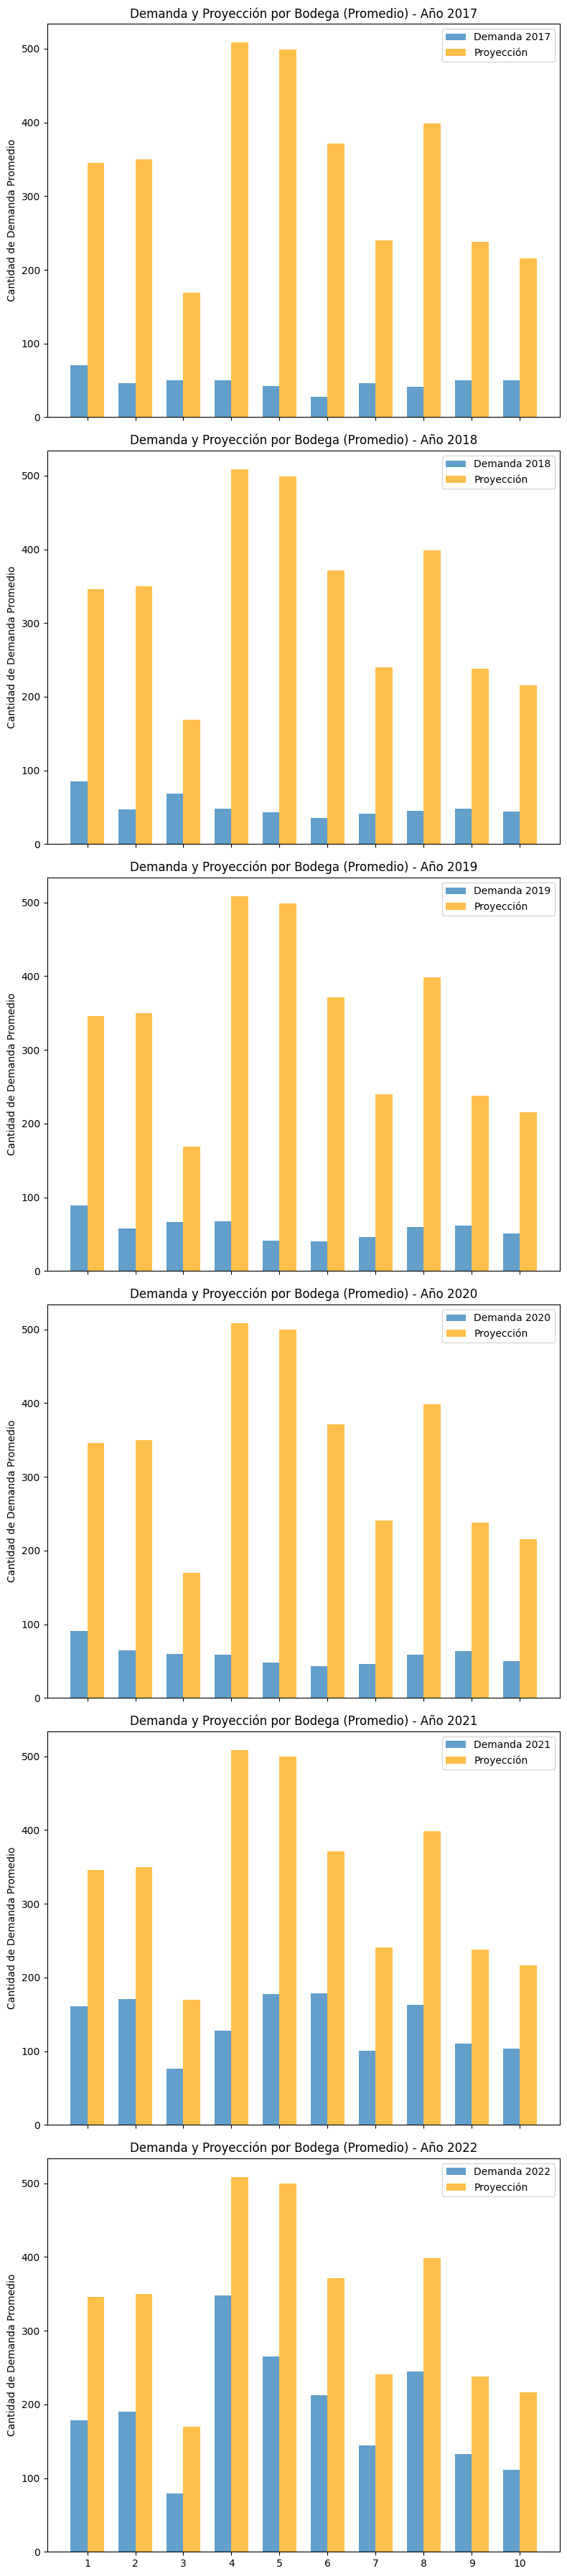

In [39]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].mean().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].mean()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Crear subplots para mostrar histogramas distintos por año
fig, axs = plt.subplots(len(años_disponibles), 1, figsize=(8, 6 * len(años_disponibles)), sharex=True)

# Ancho de cada barra
bar_width = 0.35

for i, año in enumerate(años_disponibles):
    demanda_por_año = movimientos_bodegas.loc[año]
    proyeccion_por_año = proyecciones
    proyeccion_por_año.index = [f"Proyección Bodega {b}" for b in proyeccion_por_año.index]
    
    # Posiciones de las barras
    posiciones_demanda = np.arange(len(demanda_por_año))
    posiciones_proyeccion = posiciones_demanda + bar_width
    
    axs[i].bar(posiciones_demanda, demanda_por_año, bar_width, label=f'Demanda {año}', alpha=0.7)
    axs[i].bar(posiciones_proyeccion, proyeccion_por_año, bar_width, color='orange', label='Proyección', alpha=0.7)
    
    axs[i].set_title(f'Demanda y Proyección por Bodega (Promedio) - Año {año}')
    axs[i].set_ylabel('Cantidad de Demanda Promedio')
    axs[i].set_xticks(posiciones_demanda + bar_width / 2)
    axs[i].set_xticklabels(demanda_por_año.index)
    axs[i].legend()

plt.tight_layout()
plt.show()

### Histograma Demanda Total vs Proyección por bodega

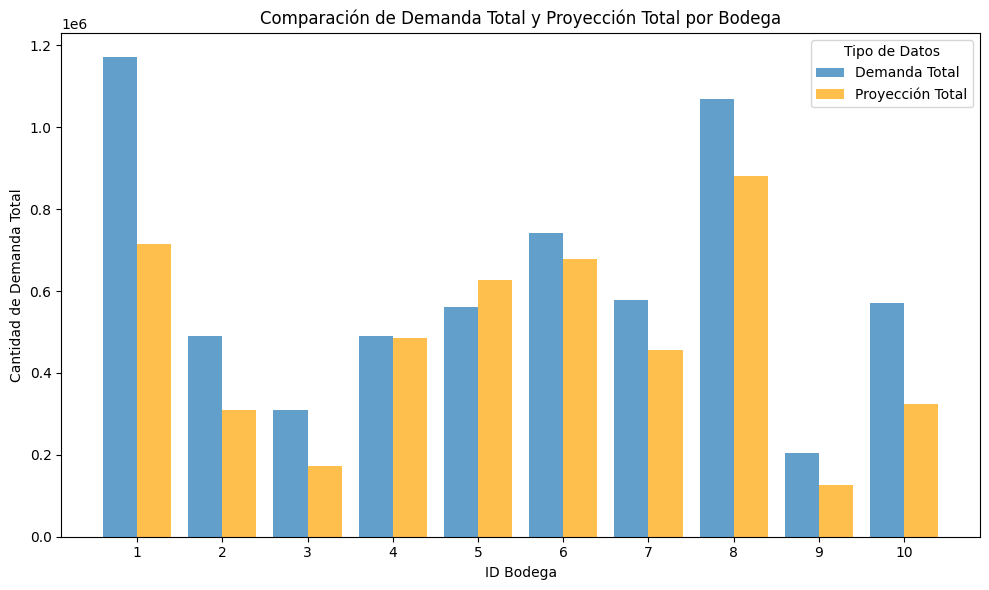

In [11]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].sum().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Ancho de cada barra
bar_width = 0.4

# Posiciones de las barras
posiciones = np.arange(len(movimientos_bodegas.columns))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

demanda_total = None
proyeccion_total = proyecciones

for i, año in enumerate(años_disponibles):
    if 2017 <= año <= 2022:
        if demanda_total is None:
            demanda_total = movimientos_bodegas.loc[año]
        else:
            demanda_total += movimientos_bodegas.loc[año]

plt.bar(posiciones, demanda_total, bar_width, label='Demanda Total', alpha=0.7)
plt.bar(posiciones + bar_width, proyeccion_total, bar_width, color='orange', label='Proyección Total', alpha=0.7)

plt.title('Comparación de Demanda Total y Proyección Total por Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Demanda Total')
plt.xticks(posiciones + bar_width / 2, demanda_total.index)
plt.legend(title='Tipo de Datos')

plt.tight_layout()
plt.show()

### Histogramas Demanda Promedio Total vs Proyeccion promedio por bodega

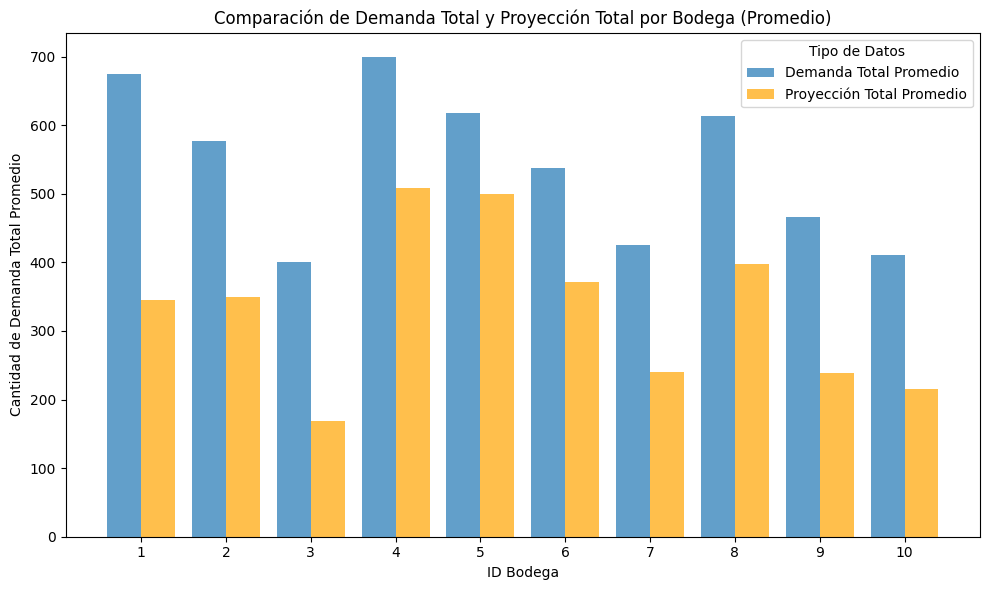

In [37]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].mean().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].mean()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Ancho de cada barra
bar_width = 0.4

# Posiciones de las barras
posiciones = np.arange(len(movimientos_bodegas.columns))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

demanda_total = None
proyeccion_total = proyecciones

for i, año in enumerate(años_disponibles):
    if 2017 <= año <= 2022:
        if demanda_total is None:
            demanda_total = movimientos_bodegas.loc[año]
        else:
            demanda_total += movimientos_bodegas.loc[año]

plt.bar(posiciones, demanda_total, bar_width, label='Demanda Total Promedio', alpha=0.7)
plt.bar(posiciones + bar_width, proyeccion_total, bar_width, color='orange', label='Proyección Total Promedio', alpha=0.7)

plt.title('Comparación de Demanda Total y Proyección Total por Bodega (Promedio)')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Demanda Total Promedio')
plt.xticks(posiciones + bar_width / 2, demanda_total.index)
plt.legend(title='Tipo de Datos')

plt.tight_layout()
plt.show()

### Gráfico Demanda total del año vs Año

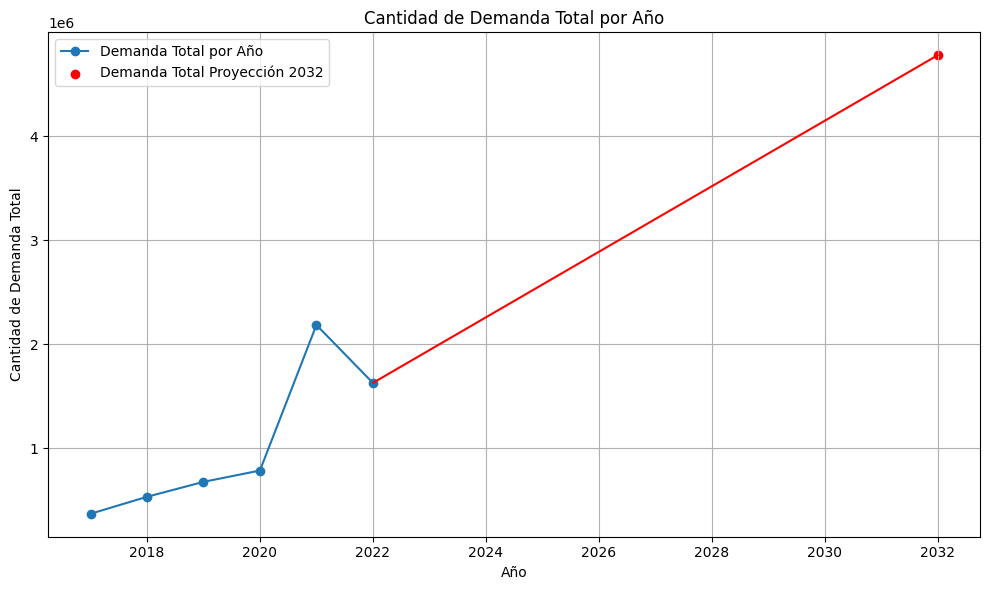

In [36]:
# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].sum().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()

# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Calcular la suma de la demanda por año
demanda_total_por_año = movimientos_bodegas.sum(axis=1)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))

plt.plot(años_disponibles, demanda_total_por_año, marker='o', label='Demanda Total por Año')

# Agregar un punto adicional
año_adicional = 2032
demanda_adicional = proyecciones.sum()  # Ajusta el valor según tu necesidad


# Verificar si el año adicional está en años_disponibles
if año_adicional not in años_disponibles:
    plt.scatter(año_adicional, demanda_adicional, color='red', label='Demanda Total Proyección 2032')
    ultimo_año = años_disponibles[-1]
    plt.plot([año_adicional, años_disponibles[-1]], [demanda_adicional, demanda_total_por_año.loc[ultimo_año]], color='red')

plt.title('Cantidad de Demanda Total por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Demanda Total')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Verificando las comunas disponibles y los ids clientes

In [20]:
# Obtener una lista de las comunas presentes en comunas_df
comunas_disponibles = comunas_df['Comuna'].unique()

# Filtrar las filas en ventas_df donde la 'Comuna Despacho' no está en comunas_disponibles
clientes_sin_comuna_asignada = ventas_df[~ventas_df['Comuna Despacho'].isin(comunas_disponibles)]

print(clientes_sin_comuna_asignada['ID Cliente'].unique())
print(clientes_sin_comuna_asignada['Comuna Despacho'].unique())

### PUEBLO HUNDIDO: no está en comunas_df (ID Cliente: 139)
### COIHAIQUE: sí está, pero esta escrito distinto en comunas_df (tiene i minúscula) (ID Cliente: 2231)
### POLPAICO: no está en comunas_df (ID Cliente: 745, pide en dos comunas Las Condes y POLPAICO)
### LONTUE: no está en comunas_df (ID Cliente: 111, pide en dos comunas Las Condes y LONTUE)
### VILLA PRAT: no está en comunas_df (ID Cliente: 2922)

[ 139 2231  745  111 2922]
['PUEBLO HUNDIDO' 'COIHAIQUE' 'POLPAICO' 'LONTUE' 'VILLA PRAT']


In [21]:
# Agrupar por 'ID Cliente' y contar las comunas únicas asociadas
conteo_comunas_por_cliente = ventas_df.groupby('ID Cliente')['Comuna Despacho'].nunique()

# Filtrar los IDs de clientes que tienen exactamente 2 comunas únicas
ids_con_dos_comunas = conteo_comunas_por_cliente[conteo_comunas_por_cliente == 2]
print(ids_con_dos_comunas)

ID Cliente
13      2
29      2
39      2
58      2
87      2
       ..
2268    2
2270    2
2509    2
2652    2
2786    2
Name: Comuna Despacho, Length: 88, dtype: int64


## Gráfico de Distribución acumulada

### Más denso sin limites (hasta el largo de la df)

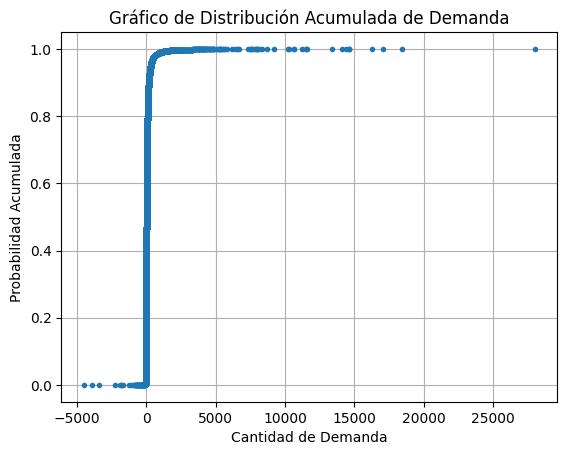

In [22]:

# Obtener las cantidades de demanda ordenadas
demandas_ordenadas = np.sort(ventas_df['Cantidad'])

# Calcular la función de distribución acumulada
distribucion_acumulada = np.arange(1, len(demandas_ordenadas) + 1) / len(demandas_ordenadas)

# Crear el gráfico de la distribución acumulada
plt.plot(demandas_ordenadas, distribucion_acumulada, marker='.', linestyle='none')
plt.xlabel('Cantidad de Demanda')
plt.ylabel('Probabilidad Acumulada')
plt.title('Gráfico de Distribución Acumulada de Demanda')
plt.grid(True)
plt.show()

### Limitando el lado izquierdo

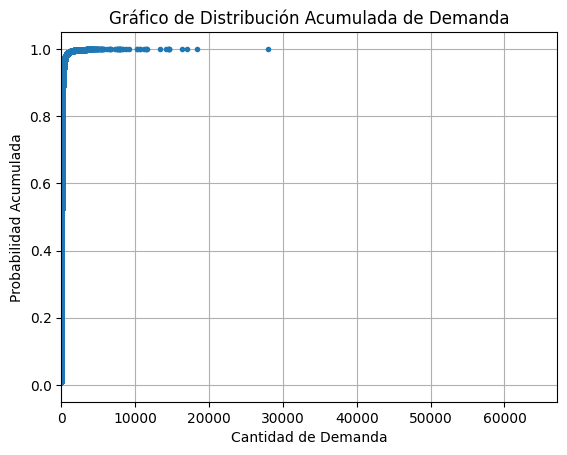

In [23]:
# Calcular la función de distribución acumulada
distribucion_acumulada = np.arange(1, len(demandas_ordenadas) + 1) / len(demandas_ordenadas)

# Crear el gráfico de la distribución acumulada
plt.plot(demandas_ordenadas, distribucion_acumulada, marker='.', linestyle='none')
plt.xlabel('Cantidad de Demanda')
plt.ylabel('Probabilidad Acumulada')
plt.title('Gráfico de Distribución Acumulada de Demanda')

# Ajustar los límites del eje x para hacer el zoom en un rango específico
plt.xlim(0, len(demandas_ordenadas))  # Ajusta los valores según el rango que desees

plt.grid(True)
plt.show()

### El más bonito, poniendo limite a la derecha tmb

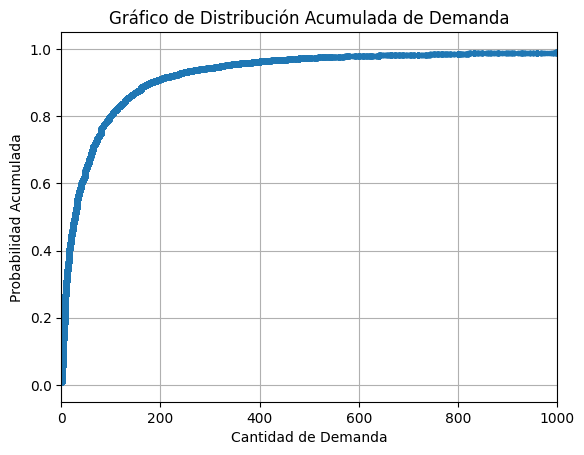

In [24]:
# Calcular la función de distribución acumulada
distribucion_acumulada = np.arange(1, len(demandas_ordenadas) + 1) / len(demandas_ordenadas)

# Crear el gráfico de la distribución acumulada
plt.plot(demandas_ordenadas, distribucion_acumulada, marker='.', linestyle='none')
plt.xlabel('Cantidad de Demanda')
plt.ylabel('Probabilidad Acumulada')
plt.title('Gráfico de Distribución Acumulada de Demanda')

# Ajustar los límites del eje x para hacer el zoom en un rango específico
plt.xlim(0, 1000)  # Ajusta los valores según el rango que desees

plt.grid(True)
plt.show()